In [477]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression


In [478]:
mydata=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/titanic-training-data.csv")

In [479]:
mydata.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [480]:
mydata.shape

(891, 12)

In [481]:
mydata.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S
821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
404,405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [482]:
mydata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [483]:
mydata['Age']=mydata['Age'].replace(to_replace=0,value=np.nan)
mydata['Age']=mydata['Age'].astype(float)

In [484]:
median1=mydata['Age'].median()
median1

28.0

In [485]:
mydata['Age'].replace(np.nan,median1,inplace=True)

In [486]:
mydata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [487]:
mydata=mydata.drop(['Cabin'],axis=1)

In [488]:
mydata=mydata.drop( ['PassengerId'] ,axis=1)

In [489]:
mydata=mydata.drop(['Ticket'],axis=1)

In [490]:
mydata=mydata.drop(['Fare'],axis=1)

In [491]:
mydata=mydata.drop( ['Name'],axis=1)

In [492]:
mode1=mydata['Embarked'].mode()

In [493]:
mydata.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
278,0,3,male,7.0,4,1,Q


In [494]:
mydata.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [495]:
mydata=pd.get_dummies(mydata,columns=['Embarked'])

In [496]:
mydata=pd.get_dummies(mydata,columns=['Sex'])

In [497]:
mydata=pd.get_dummies(mydata,columns=['Pclass'])

In [498]:
mydata.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Sex_female      uint8
Sex_male        uint8
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
dtype: object

In [499]:
mydata.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [500]:
X=mydata.drop(['Survived'],axis=1)   # drop depending variable
y=mydata['Survived']

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=1)

In [502]:
reg_model=LogisticRegression()
reg_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [503]:
reg_model.score(X_train, y_train)

0.812199036918138

In [504]:
reg_model.score(X_test, y_test)

0.7723880597014925

In [505]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [506]:
predictions=model.predict(X_test)

In [507]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7723880597014925

In [508]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       153
           1       0.78      0.66      0.71       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [509]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[131,  22],
       [ 39,  76]], dtype=int64)

<AxesSubplot:>

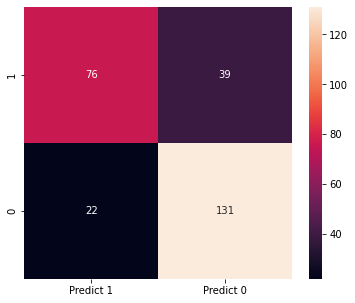

In [510]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [511]:
from sklearn.svm import SVC

In [512]:
clf=SVC(kernel='linear',C=1,gamma='auto')   # kernel for dimension for which good score 
clf.fit(X_train,y_train) 

SVC(C=1, gamma='auto', kernel='linear')

In [513]:
clf.score(X_train,y_train) 

0.8009630818619583

In [514]:
clf.score(X_test,y_test)

0.753731343283582

In [515]:
from sklearn.neighbors import KNeighborsClassifier

In [516]:
knn=KNeighborsClassifier(n_neighbors=5,p=1)

In [517]:
knn.fit(X_train,y_train)

KNeighborsClassifier(p=1)

In [518]:
knn.fit(X_train,y_train)

KNeighborsClassifier(p=1)

In [519]:
knn.score(X_test,y_test) 

0.75

In [520]:
from sklearn.tree import DecisionTreeClassifier

In [521]:
dtree=DecisionTreeClassifier(max_depth=4,criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [522]:
dtree.score(X_train,y_train)

0.8635634028892456

In [523]:
dtree.score(X_test,y_test)

0.7761194029850746

### Bagging

In [524]:
from sklearn.ensemble import BaggingClassifier

In [525]:
bgg=BaggingClassifier(n_estimators=12,base_estimator=dtree,max_samples=25)

In [526]:
bgg.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4),
                  max_samples=25, n_estimators=12)

In [527]:
bgg.score(X_train,y_train)

0.8025682182985554

In [528]:
bgg.score(X_test,y_test)

0.7835820895522388

### Boosting

In [529]:
from sklearn.ensemble import AdaBoostClassifier

In [549]:
abc=AdaBoostClassifier(n_estimators=75)

In [550]:
abc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=75)

In [551]:
abc.score(X_train,y_train)

0.8426966292134831

In [552]:
abc.score(X_test,y_test)

0.7798507462686567

### GradientBoost

In [553]:
from sklearn.ensemble import GradientBoostingClassifier

In [652]:
gb=GradientBoostingClassifier(n_estimators=20,max_depth=5,random_state=1)  

In [653]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=20, random_state=1)

In [654]:
gb.score(X_train,y_train)

0.8908507223113965

In [655]:
gb.score(X_test,y_test)

0.7761194029850746

### Random Forest Gradient

In [657]:
from sklearn.ensemble import RandomForestClassifier

In [695]:
rfc=RandomForestClassifier( n_estimators=20,random_state=1,)

In [696]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=20, random_state=1)

In [697]:
gb.score(X_train,y_train)

0.8908507223113965

In [698]:
gb.score(X_test,y_test)

0.7761194029850746